In [1]:
from rbm import *

from sklearn import datasets
import numpy as np
import pandas as pd

from sklearn import preprocessing

In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [3]:
# scale the dataset - unless you want to compute the
# variance mean (say for GMM models??)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [29]:
gb_rbm = GaussianBernoulliRBM(1, n_iter=1000)
gb_rbm

GaussianBernoulliRBM(batch_size=10, learning_rate=0.1, n_components=1,
           n_iter=1000, random_state=None, sigma=1, verbose=False)

In [30]:
gb_rbm.fit(X_scaled)
rbm_feats = gb_rbm.transform(X_scaled)

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

In [33]:
from ggplot import *

rbm_df = pd.DataFrame(rbm_feats)

In [34]:
rbm_df.columns = ['feat{}'.format(x) for x in rbm_df.columns]
rbm_df['response'] = [str(x) for x in Y]

In [35]:
rbm_df.head()

,feat0,response
0,0.009107,0
1,0.025320,0
2,0.009372,0
3,0.012710,0
4,0.005805,0


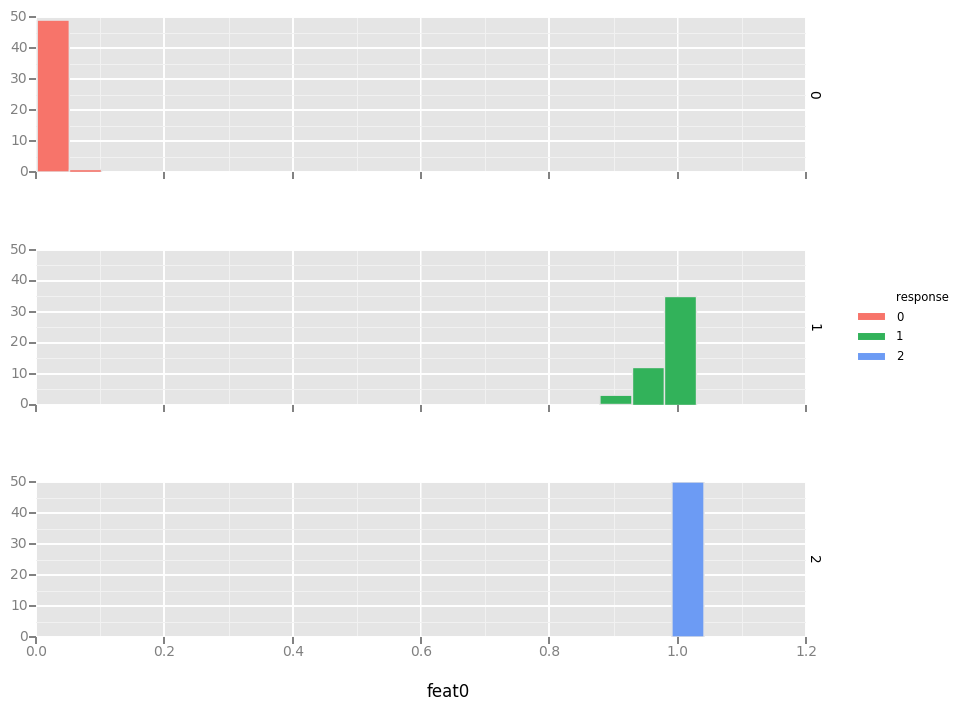

<ggplot: (-9223371897787153369)>

In [36]:
ggplot(rbm_df, aes(x='feat0', fill='response')) + geom_histogram(binwidth=0.05) + facet_grid('response')